In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#Load data
raw_dataset= pd.read_csv('data.csv', na_values='?')
dataset = raw_dataset.copy()

#Preprocess data
dataset= dataset.drop(dataset[dataset['model'] != 'A_T1_C'].index)
dataset.pop('A')
dataset.pop('model')
dataset['Ti']= dataset['T'].shift(1)
dataset= dataset.dropna()
dataset.head()


c:\Users\Josè Castillo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


,loss,mae,mse,val_loss,val_mae,val_mse,epoch
57,0.104927,0.276428,0.104927,0.146590,0.352677,0.146590,57
58,0.083868,0.230448,0.083868,0.079919,0.246017,0.079919,58
59,0.087785,0.246725,0.087785,0.041775,0.163551,0.041775,59
60,0.120994,0.296261,0.120994,0.034850,0.147025,0.034850,60
61,0.083582,0.230820,0.083582,0.080553,0.257147,0.080553,61


In [ ]:
#Split tran and test sets
train= dataset.sample(frac=0.8, random_state=0)
test= dataset.drop(train.index)

#Get data stats
train_stats = train.describe()
train_stats.pop('T')
train_stats = train_stats.transpose()
train_stats

In [ ]:
#Pop the output from the dataset
train_labels = train.pop('T')
test_labels = test.pop('T')

#Normalize data
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train)
normed_test_data = norm(test)

#Build model
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)
  model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
  
  return model

model = build_model()
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
model.summary()

In [ ]:
#Run the model
EPOCHS = 1000
history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[early_stop])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

In [ ]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:.2f} Temperature".format(mae))

6/6 - 0s - 11ms/step - loss: 0.0854 - mae: 0.2615 - mse: 0.0854
Testing set Mean Abs Error: 0.26 Temperature


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


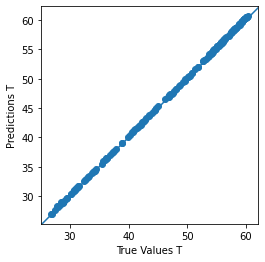

In [70]:
import matplotlib.pyplot as plt
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values T')
plt.ylabel('Predictions T')
plt.axis('equal')
plt.axis('square')
_ = plt.plot([-100, 100], [-100, 100])

In [ ]:
dataset = raw_dataset.copy()

#Preprocess data
dataset= dataset.drop(dataset[dataset['model'] != 'A_T2_C'].index)
dataset.pop('A')
dataset.pop('model')
dataset['Ti']= dataset['T'].shift(1)
dataset= dataset.dropna()
dataset= dataset.sample(frac=0.05, random_state=0)

labels = dataset.pop('T')
normed_data = norm(dataset)

#Make predictions
predictions = model.predict(normed_data).flatten()

plt.scatter(labels, predictions)
plt.xlabel('True Values T')
plt.ylabel('Predictions T')
plt.axis('equal')
plt.axis('square')
a = plt.plot([-100, 100], [-100, 100])

In [ ]:
#Evaluate efficiency
loss, mae, mse = model.evaluate(normed_data, labels, verbose=2)

print("Testing set Mean Abs Error: {:.2f} Temperature".format(mae))